In [1]:
# Image Processing and Visualization
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seam_carving
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Neural Network
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Directories
import os
import shutil

import random
import time
import re

In [2]:
# Directories
original_root = "OriginalImage"
output_root = "ColorVariants"
seam_carved_root = "SeamCarvedImages"
variants = ["Original", "Grayscale", "Swap", "Red", "Green", "Blue"]
class_names = os.listdir(original_root)

In [3]:
# Most fruits except grapes: strictly one fruit only
# Banana: Horizontal orientation
# Grape: Clustered, stalks are ok
# Guava: No leaves
# Strawberry: With leaves, no (or little) stem
# Avoid shadows (except fresh pomegranate, no choice)

index_lists = {
    "FreshApple": list(range(91, 141)), 
    "FreshBanana": list(range(37, 41)) + [42, 44, 47, 48, 50, 51] + 
    list(range(53, 59)) + list(range(61, 70)) + [74, 77, 79, 80, 81] + 
    list(range(92, 97)) + list(range(98, 107)) + [109, 110, 111, 119, 120, 121],
    "FreshGrape": list(range(151, 201)),
    "FreshGuava": list(range(7, 19)) + list(range(37, 45)) + list(range(48, 53)) 
    + list(range(59, 67)) + list(range(69, 78)) + list(range(79, 87)),
    "FreshJujube": list(range(2, 47)) + list(range(82, 87)),
    "FreshOrange": list(range(1, 22)) + [24] + list(range(27, 55)),
    "FreshPomegranate": list(range(1, 35)) + list(range(37, 53)),
    "FreshStrawberry": list(range(1, 8)) + list(range(42, 52)) + list(range(54, 64)) + 
    list(range(66, 70)) + [87, 152, 153] + list(range(156, 161)) + list(range(164, 170)) + list(range(195, 200)),

    "RottenApple": list(range(15, 51)) + list(range(53, 67)),
    "RottenBanana": list(range(73, 103)) + list(range(106, 113)) + list(range(117, 121)) + [122] + list(range(124, 132)),
    "RottenGrape": list(range(110, 113)) + list(range(148, 182)) + list(range(183, 196)),
    "RottenGuava": list(range(6, 29)) + list(range(39, 66)),
    "RottenJujube": list(range(18, 68)),
    "RottenOrange": list(range(1, 51)),
    "RottenPomegranate": list(range(2, 33)) + list(range(74, 86)) + list(range(93, 100)),
    "RottenStrawberry": [1, 5, 10, 11, 12, 13, 21, 50, 51, 52, 84] + list(range(95, 102)) + list(range(151, 167)) + 
    list(range(169, 180)) + [189, 190, 191, 196, 197]
}

for class_name, index_list in index_lists.items():
    print(class_name, len(index_list))

FreshApple 50
FreshBanana 50
FreshGrape 50
FreshGuava 50
FreshJujube 50
FreshOrange 50
FreshPomegranate 50
FreshStrawberry 50
RottenApple 50
RottenBanana 50
RottenGrape 50
RottenGuava 50
RottenJujube 50
RottenOrange 50
RottenPomegranate 50
RottenStrawberry 50


In [ ]:
def seam_carving_class(class_name):
    class_index_list = index_lists[class_name]
    assert len(class_index_list) == 50, f"List only has {len(class_index_list)} elements"
    class_src = os.path.join(original_root, class_name)
    image_names = [f"{class_name} ({idx}).jpg" for idx in class_index_list]
    image_paths = [os.path.join(class_src, image_name) for image_name in image_names]

    times = []
    seam_carved_resized_images = []
    save_dir = os.path.join("SeamCarvedImages", class_name)
    os.makedirs(save_dir, exist_ok = True)

    for i in range(50):

        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        t1 = time.time()
        image_h, image_w, _ = image.shape
        scale = 512 / min(image_h, image_w)
        new_w, new_h = int(image_w * scale), int(image_h * scale)
        resized_image = cv2.resize(image, (new_w, new_h), interpolation = cv2.INTER_AREA)

        seam_carved_image = seam_carving.resize(
            resized_image,
            (512, 512),
            energy_mode = "backward",
            keep_mask = None
        )
        
        seam_carved_resized_image = cv2.resize(seam_carved_image, (128, 128), interpolation = cv2.INTER_AREA)
        t2 = time.time()

        times.append(t2-t1)
        seam_carved_resized_images.append(seam_carved_resized_image)
        save_path = os.path.join(save_dir, f"{class_name} ({class_index_list[i]}).jpg")
        cv2.imwrite(save_path, cv2.cvtColor(seam_carved_resized_image, cv2.COLOR_RGB2BGR))
        # print(f"Image {i+1}/50 processed")

    print(f"Total time for {class_name}: {sum(times)}")
    # return seam_carved_resized_images

for class_name in class_names:
    seam_carving_class(class_name)

Total time for FreshApple: 31.08688187599182
Total time for FreshBanana: 280.2102825641632
Total time for FreshGrape: 124.0224256515503
Total time for FreshGuava: 57.868332624435425
Total time for FreshJujube: 76.42867827415466
Total time for FreshOrange: 33.00668239593506
Total time for FreshPomegranate: 45.08689284324646
Total time for FreshStrawberry: 162.67777132987976
Total time for RottenApple: 42.117921352386475
Total time for RottenBanana: 212.27619886398315
Total time for RottenGrape: 168.03014039993286
Total time for RottenGuava: 188.68843173980713
Total time for RottenJujube: 50.961724042892456
Total time for RottenOrange: 15.732592821121216
Total time for RottenPomegranate: 51.23267650604248
Total time for RottenStrawberry: 57.764617919921875


In [81]:
def pad_to_square(img):
    h, w = img.shape[:2]
    max_dim = max(h, w)

    # Amount of padding needed
    top = (max_dim - h) // 2
    bottom = max_dim - h - top
    left = (max_dim - w) // 2
    right = max_dim - w - left

    # Replicate nearest pixel outward
    padded = cv2.copyMakeBorder(
        img,
        top, bottom, left, right,
        borderType = cv2.BORDER_REPLICATE
    )

    return padded

In [ ]:
def compile_images(class_name, source_folder, save_folder, title):
    class_index_list = index_lists[class_name]
    assert len(class_index_list) == 50, f"List only has {len(class_index_list)} elements"
    class_src = os.path.join(source_folder, class_name)
    image_names = [f"{class_name} ({idx}).jpg" for idx in class_index_list]
    image_paths = [os.path.join(class_src, image_name) for image_name in image_names]

    fig, axes = plt.subplots(5, 10, figsize = (30, 15))
    axes = axes.flatten()
    for i in range(50):
        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        h, w = image.shape[:2]
        new_h = 128
        new_w = int(w * (new_h / h))
        image_small = cv2.resize(image, (new_w, new_h), interpolation = cv2.INTER_AREA)

        axes[i].imshow(image_small) 
        axes[i].set_title(f"Index {class_index_list[i]}", fontsize = 8)
        axes[i].axis("off")
        # print(f"{class_name}: Image {i+1}/50")

    plt.suptitle(title)
    plt.tight_layout()

    os.makedirs(save_folder, exist_ok = True)
    save_path = os.path.join(save_folder, f"{class_name}.png")
    fig.savefig(save_path, dpi = 150)
    plt.close(fig)

    # plt.show()
    
    return image_paths
    

In [ ]:
for class_name in class_names: 
    t1 = time.time()
    compile_images(class_name, original_root, "SelectedImages", f"Images Used for {class_name}")
    t2 = time.time()
    print(f"Time taken for {class_name}: {(t2-t1):.4f}")

Time taken for FreshApple: 10.6851
Time taken for FreshBanana: 8.6617
Time taken for FreshGrape: 11.2154
Time taken for FreshGuava: 6.2341
Time taken for FreshJujube: 11.2465
Time taken for FreshOrange: 10.9674
Time taken for FreshPomegranate: 9.1846
Time taken for FreshStrawberry: 6.2408
Time taken for RottenApple: 11.3350
Time taken for RottenBanana: 18.2173
Time taken for RottenGrape: 5.7730
Time taken for RottenGuava: 10.5931
Time taken for RottenJujube: 8.3042
Time taken for RottenOrange: 6.7785
Time taken for RottenPomegranate: 10.3225
Time taken for RottenStrawberry: 8.4013


In [ ]:
for class_name in class_names: 
    t1 = time.time()
    compile_images(class_name, seam_carved_root, "SelectedSeamCarvedImages", f"Seam-Carved Images Used for {class_name}")
    t2 = time.time()
    print(f"Time taken for {class_name}: {(t2-t1):.4f}")

Time taken for FreshApple: 3.0349
Time taken for FreshBanana: 4.1343
Time taken for FreshGrape: 8.5039
Time taken for FreshGuava: 7.5463
Time taken for FreshJujube: 7.1477
Time taken for FreshOrange: 8.9395
Time taken for FreshPomegranate: 7.2427
Time taken for FreshStrawberry: 7.2865
Time taken for RottenApple: 7.4101
Time taken for RottenBanana: 10.0330
Time taken for RottenGrape: 7.3702
Time taken for RottenGuava: 7.4640
Time taken for RottenJujube: 7.2120
Time taken for RottenOrange: 7.3841
Time taken for RottenPomegranate: 9.9276
Time taken for RottenStrawberry: 4.2430


In [10]:
# Image size
img_size = (128, 128)

In [ ]:
if os.path.exists(output_root):
    shutil.rmtree(output_root)

for variant in variants:
    os.makedirs(os.path.join(output_root, variant), exist_ok = True)
    variant_path = os.path.join(output_root, variant)

    for class_name in class_names:
        class_index_list = index_lists[class_name]
        assert len(class_index_list) == 50, f"List only has {len(class_index_list)} elements"

        # Source: original folder (for banana/strawberry) and seam-carved (for the rest)
        if "Banana" in class_name or "Strawberry" in class_name:
            class_src = os.path.join(original_root, class_name)
        else:
            class_src = os.path.join(seam_carved_root, class_name)

        image_names = [f"{class_name} ({idx}).jpg" for idx in class_index_list]
        image_paths = [os.path.join(class_src, image_name) for image_name in image_names]
        save_dir = os.path.join(variant_path, class_name)
        os.makedirs(save_dir, exist_ok = True)

        t1 = time.time()

        for i in range(50):
            image = cv2.imread(image_paths[i])

            # Square padding and resizing for banana and strawberry
            if "Banana" in class_name or "Strawberry" in class_name:
                squared = pad_to_square(image)
                img_resized = cv2.resize(squared, img_size)
            else:
                img_resized = image

            b, g, r = cv2.split(img_resized)
            zeros = np.zeros_like(b)
            if variant == "Original": converted = img_resized
            elif variant == "Grayscale":
                gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
                converted = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
            elif variant == "Swap": converted = cv2.merge([r, g, b])
            elif variant == "Red": converted = cv2.merge([zeros, zeros, r])
            elif variant == "Green": converted = cv2.merge([zeros, g, zeros])
            elif variant == "Blue": converted = cv2.merge([b, zeros, zeros])

            save_path = os.path.join(save_dir, f"{class_name} ({class_index_list[i]}).jpg")
            cv2.imwrite(save_path, converted)

        t2 = time.time()
        print(f"Time taken for {variant} - {class_name}: {(t2-t1):.4f}")


Time taken for Original - FreshApple: 0.1390
Time taken for Original - FreshBanana: 0.5983
Time taken for Original - FreshGrape: 0.0594
Time taken for Original - FreshGuava: 0.0575
Time taken for Original - FreshJujube: 0.0522
Time taken for Original - FreshOrange: 0.0850
Time taken for Original - FreshPomegranate: 0.0713
Time taken for Original - FreshStrawberry: 1.9412
Time taken for Original - RottenApple: 0.1338
Time taken for Original - RottenBanana: 4.1169
Time taken for Original - RottenGrape: 0.0666
Time taken for Original - RottenGuava: 0.0828
Time taken for Original - RottenJujube: 0.0749
Time taken for Original - RottenOrange: 0.1307
Time taken for Original - RottenPomegranate: 0.1279
Time taken for Original - RottenStrawberry: 3.2847
Time taken for Grayscale - FreshApple: 0.0798
Time taken for Grayscale - FreshBanana: 0.6175
Time taken for Grayscale - FreshGrape: 0.0828
Time taken for Grayscale - FreshGuava: 0.0896
Time taken for Grayscale - FreshJujube: 0.0965
Time taken f

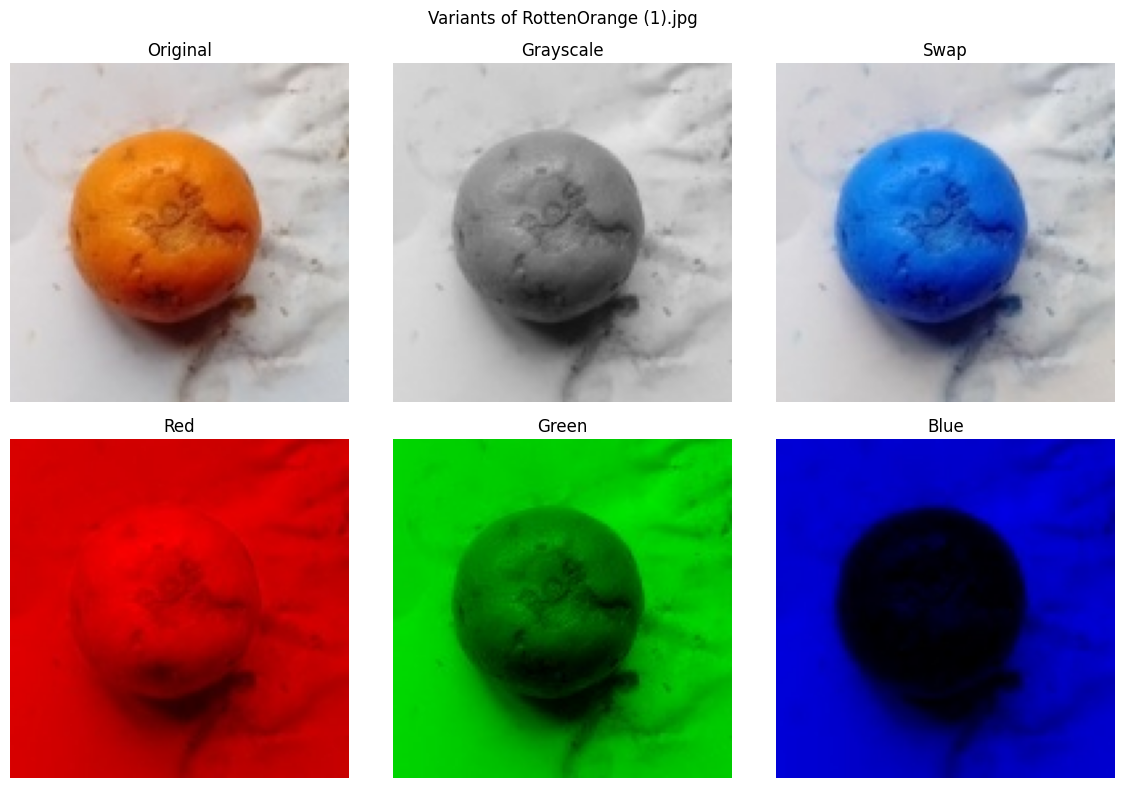

In [50]:
def natural_key(s):
    # Split into text and number chunks, convert numbers to int
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(r'(\d+)', s)]

def generate_variant_plots(class_name, file_name_index):
    files = os.listdir(os.path.join(output_root, variants[0], class_name))
    files_sorted = sorted(files, key = natural_key)
    file_name = files_sorted[file_name_index]

    fig, axes = plt.subplots(2, 3, figsize = (12, 8))
    for i, variant in enumerate(variants):
        path = os.path.join(output_root, variant, class_name, file_name)
        if os.path.exists(path): 
            image_bgr = cv2.imread(path)
            image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
            axes = axes.flatten()
            axes[i].imshow(image)
            axes[i].axis("off")
            axes[i].set_title(variant)
        
        plt.suptitle(f"Variants of {file_name}")
        plt.tight_layout()

    plt.savefig("Results/variants.png")
    plt.show()

generate_variant_plots("RottenOrange", 0)

In [5]:
def reset_random_state(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [11]:
reset_random_state()

aug = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

datagen = ImageDataGenerator(
    validation_split = 0.2,  # 80/20 split
    **{k: v for k, v in aug.__dict__.items() if k in ["rotation_range", "width_shift_range",
                                                      "height_shift_range", "shear_range",
                                                      "zoom_range", "horizontal_flip",
                                                      "fill_mode"]}
)

batch_size = 32

In [ ]:
def build_model(num_classes):
    model = Sequential([
        Input(shape = (128, 128, 3)),
        Conv2D(32, (3, 3), activation = "relu"),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation = "relu"),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation = "relu"),
        MaxPooling2D(2, 2),

        Conv2D(256, (3, 3), activation = "relu"),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(256, activation = "relu"),
        Dropout(0.2),
        Dense(num_classes, activation = "softmax")
    ])
    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [ ]:
histories = {}
y_trues = {}
y_preds = {}

for variant in variants:
    reset_random_state()

    variant_path = os.path.join(output_root, variant)
    print(f"-----Variant: {variant}-----")
    train_gen = datagen.flow_from_directory(
        variant_path,
        target_size = img_size,
        class_mode = "categorical",
        batch_size = batch_size,
        subset = "training"
    )
    val_gen = datagen.flow_from_directory(
        variant_path,
        target_size = img_size,
        class_mode =  "categorical",
        batch_size = batch_size,
        subset = "validation",
        shuffle = False # for confusion matrix
    )

    model = build_model(num_classes = train_gen.num_classes)
    history = model.fit(train_gen, validation_data = val_gen, epochs = 20)
    
    y_true = val_gen.classes
    y_pred_probs = model.predict(val_gen)
    y_pred = np.argmax(y_pred_probs, axis = 1)

    histories[variant] = history
    y_trues[variant] = y_true
    y_preds[variant] = y_pred

    model.save(f"cnn_sted_{os.path.basename(variant_path)}.keras")

-----Variant: Original-----
Found 640 images belonging to 16 classes.
Found 160 images belonging to 16 classes.
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 403ms/step - accuracy: 0.1688 - loss: 6.2609 - val_accuracy: 0.4437 - val_loss: 1.6726
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - accuracy: 0.5266 - loss: 1.4333 - val_accuracy: 0.5625 - val_loss: 1.2826
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.6016 - loss: 1.1688 - val_accuracy: 0.6625 - val_loss: 0.8489
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.7250 - loss: 0.7624 - val_accuracy: 0.6687 - val_loss: 0.9187
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.7047 - loss: 0.7918 - val_accuracy: 0.7250 - val_loss: 0.8360
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 0.7422 - loss: 0.6928 - val_accuracy: 0.7125 - val_loss: 0.8473
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.7984 - loss: 0.6020 - val_accuracy: 0.5188 - val_loss

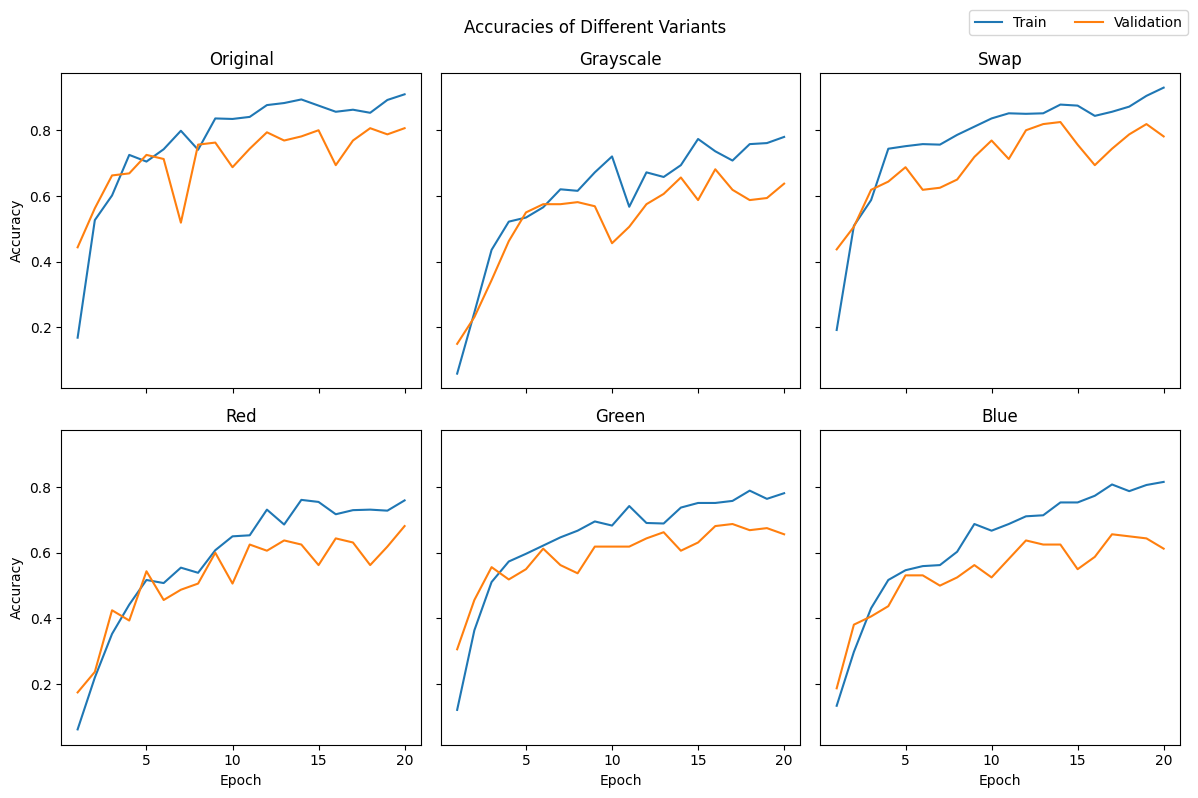

In [20]:
def plot_accuracies():
    fig, axes = plt.subplots(2, 3, figsize = (12, 8), sharex = True, sharey = True)

    for i, (variant, history) in enumerate(histories.items()):
        ax = axes[i//3, i%3]
        ax.plot(range(1, 21), history.history["accuracy"], label = "Train")
        ax.plot(range(1, 21), history.history["val_accuracy"], label = "Validation")
        ax.set_title(variant)
        if i//3 == 1: ax.set_xlabel("Epoch")
        if i%3 == 0: ax.set_ylabel("Accuracy")
        
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc = "upper right", bbox_to_anchor = (1, 1), ncol = 2)
    plt.suptitle("Accuracies of Different Variants")
    plt.tight_layout()
    plt.savefig("Results/accuracies.png")
    plt.show()

plot_accuracies()

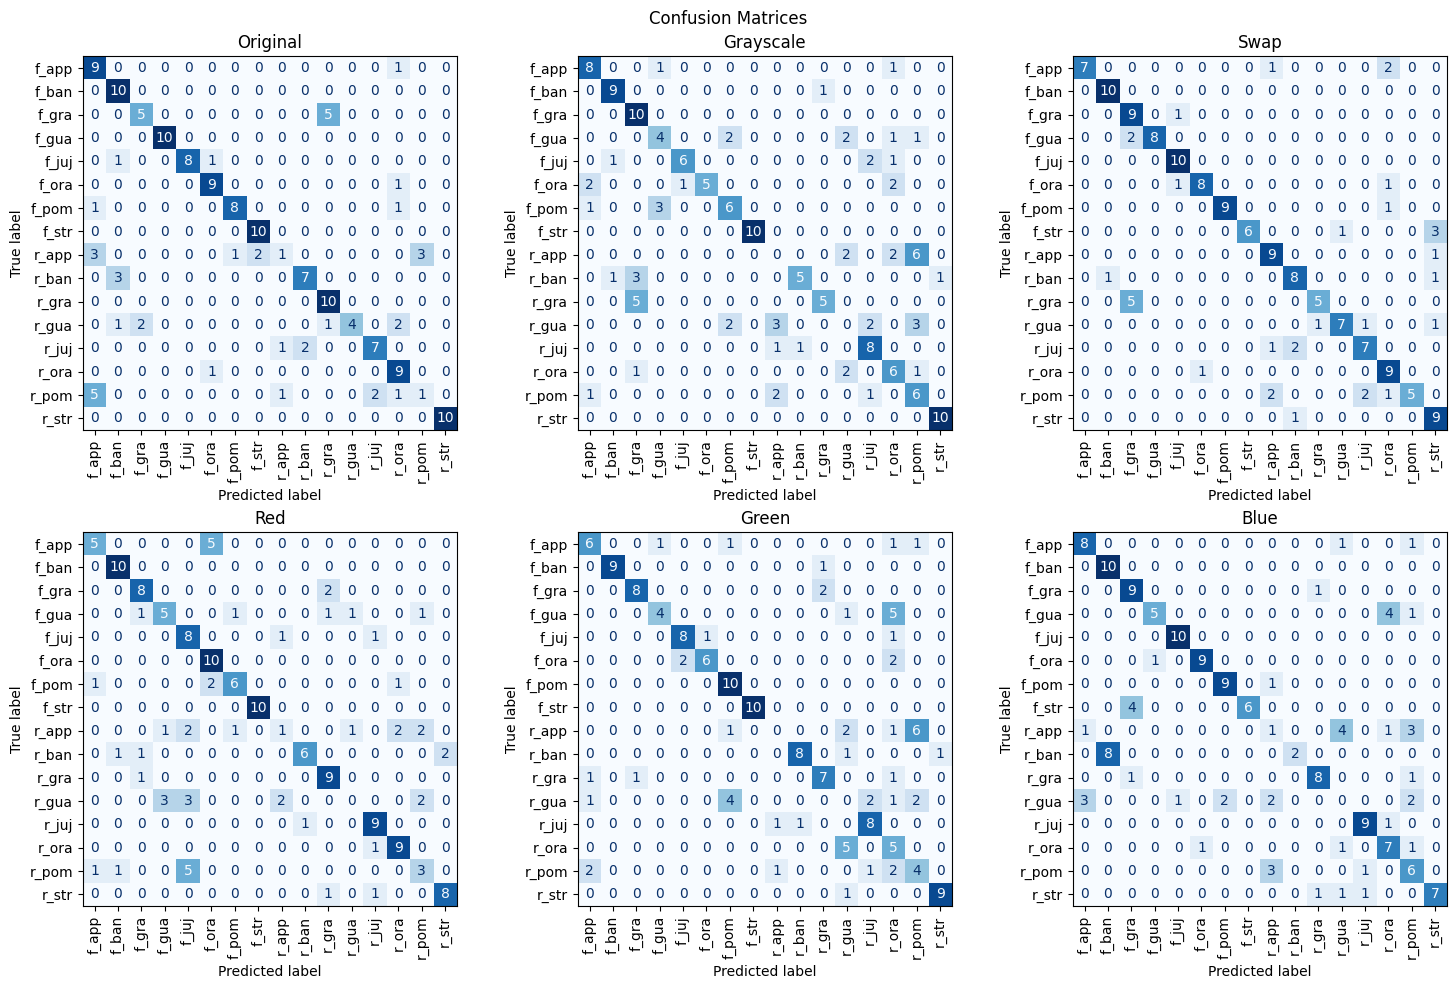

In [51]:
short_fruit_names = ["app", "ban", "gra", "gua", "juj", "ora", "pom", "str"]
short_status_names = ["f", "r"]
short_names = [f"{s}_{f}" for s in short_status_names for f in short_fruit_names]

def display_cm(variant, ax = None):
    y_true = y_trues[variant]
    y_pred = y_preds[variant]
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = short_names)
    disp.plot(cmap = plt.cm.Blues, ax = ax, colorbar = False)
    ax = ax if ax is not None else plt.gca()
    plt.setp(ax.get_xticklabels(), rotation = 90, ha = "center")
    if ax is None:
        plt.title(f"Confusion Matrix for {variant}")
        plt.show()
    else:
        ax.set_title(variant)
    
def display_cms():
    fig, axes = plt.subplots(2, 3, figsize = (15, 10))

    for i, variant in enumerate(variants):
        ax = axes[i//3, i%3]
        display_cm(variant, ax = ax)

    plt.suptitle("Confusion Matrices")
    plt.tight_layout()
    plt.savefig("Results/confusion_matrices.png")
    plt.show()

display_cms()

In [37]:
for variant in ["Original"]:
    reset_random_state()

    variant_path = os.path.join(output_root, variant)
    print(f"-----Variant: {variant}-----")
    train_gen = datagen.flow_from_directory(
        variant_path,
        target_size = img_size,
        class_mode = "categorical",
        batch_size = batch_size,
        subset = "training"
    )
    val_gen = datagen.flow_from_directory(
        variant_path,
        target_size = img_size,
        class_mode =  "categorical",
        batch_size = batch_size,
        subset = "validation",
        shuffle = False # for confusion matrix
    )

    model = build_model(num_classes = train_gen.num_classes)
    history = model.fit(train_gen, validation_data = val_gen, epochs = 20)
    
    y_true = val_gen.classes
    y_pred_probs = model.predict(val_gen)
    y_pred = np.argmax(y_pred_probs, axis = 1)

-----Variant: Original-----
Found 640 images belonging to 16 classes.
Found 160 images belonging to 16 classes.
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 663ms/step - accuracy: 0.1688 - loss: 6.2609 - val_accuracy: 0.4437 - val_loss: 1.6726
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 364ms/step - accuracy: 0.5266 - loss: 1.4333 - val_accuracy: 0.5625 - val_loss: 1.2826
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.6016 - loss: 1.1688 - val_accuracy: 0.6625 - val_loss: 0.8489
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - accuracy: 0.7250 - loss: 0.7624 - val_accuracy: 0.6687 - val_loss: 0.9187
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.7047 - loss: 0.7918 - val_accuracy: 0.7250 - val_loss: 0.8360
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - accuracy: 0.7422 - loss: 0.6928 - val_accuracy: 0.7125 - val_loss: 0.8473
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.7984 - loss: 0.6020 - val_accuracy: 0.5188 - val_los

In [46]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,256,242 (31.50 MB)

 Trainable params: 2,752,080 (10.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,504,162 (21.00 MB)

In [43]:
import numpy as np

# Adjust shape to your input size
dummy_input = np.random.rand(1, *img_size, 3).astype(np.float32)
_ = model(dummy_input)  # forces the graph to build

In [44]:
model.build(input_shape=(None, *img_size, 3))

In [45]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
layer_outputs

AttributeError: The layer sequential_9 has never been called and thus has no defined input.

In [ ]:
def plot_layer(layer_idx):
    feature_map = feature_maps[layer_idx][0]
    num_filters = feature_map.shape[-1]

    num_filters = min(16, feature_map.shape[-1])
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_map[:, :, i], cmap='viridis')
        ax.axis('off')
        ax.set_title(f'Filter {i}')
    plt.suptitle(f"Feature Maps for Layer {layer_idx}")
    plt.tight_layout()
    plt.show()
